# Learning XOR

The XOR function ("exclusive or") is an operation on two binary values, $x_1$ and $x_2$. When EXACTLY one of these binary values is equal to 1, the XOR function returns 1. Otherwise it returns 0. The XOR function provides the **target function** $y = f^*(\bf{x})$ that we want to learn. Our model provides a function $y = f(\bf{x}; \bf{\theta})$, and our learning algorithm will *adapt* the parameters $\bf{\theta})$ to make $f$ as similar as possible to $f^*$.

In this simple example we will not consider the statistical generalization and we want our network to perform correctly on only the four input points $\mathbb{X} = \{[0,0]^T, [0,1]^T, [1,0]^T, [1,1]^T\}$, we will train the network on all these four points, and the only challenge is to fit the training set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
f_ast = np.array([[0], [1], [1], [0]])

Here we design a simple feedforward neural network with only one hidden layer consisting of two hidden units.

In [3]:
# Define neural network structure.
INPUT, HIDDEN1, OUTPUT = 2, 2, 1

In [4]:
# Neural Network Initializations Using Uniform Distribution.
# Hidden Layer Weights.
W1 = np.random.uniform(size = (INPUT, HIDDEN1))
# Hidden Layer Bias.
c1 = np.random.uniform(size = (1, HIDDEN1))
# Output Layer Weights.
w = np.random.uniform(size = (HIDDEN1, OUTPUT))

print("Initial Hidden Layer Weights: ",end="")
print(*W1)
print("Initial Hidden Layer Bias: ",end="")
print(*c1)
print("Initial Output Layer Weights: ",end="")
print(*w)

Initial Hidden Layer Weights: [0.43236275 0.11498529] [0.38740017 0.55223174]
Initial Hidden Layer Bias: [0.34192521 0.6753842 ]
Initial Output Layer Weights: [0.85802904] [0.88151134]


## Training Using ReLU Activation Function
Here, we use the Rectified Linear Unit (ReLU) as the activation function.

In [13]:
def ReLU_forward(x):
    """
    Computes the forward pass for ReLU Activation.
    Input:
    - x: nputs, of any shape.
    
    Returns a tuple of (output, cache).
    """
    
    return x * (x > 0).astype(float), x

In [14]:
# Compute Hidden Layer Activation h = g(XW + c), where g is the ReLU Activation Function.
g1 = np.dot(X, W1)
g1 += c1
h1, x_hidden1 = ReLU_forward(g1)
print ("Hidden Layer Output: ", end="")
print(*h1)

# Compute Output Layer Activation.
f = np.dot(h1, w)
print("Output: ", end="")
print(*f)

Hidden Layer Output: [0.03139985 0.03541044] [ 4.43556312 -0.        ] [-0.         4.3710324] [ 0.03363415 -0.        ]
Output: [0.01517813] [0.99983627] [0.99987848] [0.0075816]


Backward Pss Using Gradient Descent.

In [15]:
def ReLU_backward(delta, x_previous):
    """
    Computes the backward pass for ReLU Activation.
    Input:
    - delta: derivatives coming from back propagation.
    
    Returns:
    - dx: gradient with respect to x.
    """
    
    return delta * (x_previous >= 0)

In [16]:
# Back Propagation.
error = f_ast - f
df = error
error_hidden1 = df.dot(w.T)
dHidden1 = error_hidden1 * ReLU_backward(h1, x_hidden1)

In [17]:
# Updating Weights and Biases.
alpha = 0.1 # learning rate
w += h1.T.dot(df) * alpha
W1 += X.T.dot(dHidden1) * alpha
c1 += np.sum(dHidden1, axis=0, keepdims=True) * alpha

Performance Measure: Mean Squared Error

In [18]:
def computeMSE(y, y_ast):
    return (np.square(y_ast - y)).mean(axis=0)

Complete Code:

Initial Hidden Layer Weights: [0.0446206  0.23911628] [0.1541443  0.99451726]
Initial Hidden Layer Bias: [0.64814822 0.36153094]
Initial Output Layer Weights: [0.96319415] [0.38580146]
Final hidden weights: [ 4.35728871 -4.36146073] [-4.38061231  4.34144877]
Final hidden bias: [0.03119036 0.03548225]
Final output weights: [0.22778578] [0.22843609]

Output from neural network after 10,000 epochs: [0.01522005] [0.99986979] [1.00014098] [0.0053346]
Final Mean Squared Error: 6.503618319343245e-05


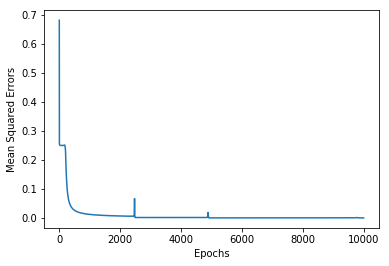

In [19]:
import numpy as np 
# np.random.seed(0)

def ReLU_forward(x):
    """
    Computes the forward pass for ReLU Activation.
    Input:
    - x: nputs, of any shape.
    
    Returns a tuple of (output, cache).
    """
    
    return x * (x > 0), x

def ReLU_backward(delta, x_previous):
    """
    Computes the backward pass for ReLU Activation.
    Input:
    - delta: derivatives coming from back propagation.
    
    Returns:
    - dx: gradient with respect to x.
    """
    
    return delta * (x_previous >= 0)

# Define neural network structure.
INPUT, HIDDEN1, OUTPUT = 2, 2, 1

# Input datasets and ground truths.
X = np.array([[0,0], [0,1], [1,0], [1,1]])
f_ast = np.array([[0], [1], [1], [0]])

# Neural Network Initializations Using Uniform Distribution.
# Hidden Layer Weights.
W1 = np.random.uniform(size = (INPUT, HIDDEN1))
# Hidden Layer Bias.
c1 = np.random.uniform(size = (1, HIDDEN1))
# Output Layer Weights.
w = np.random.uniform(size = (HIDDEN1, OUTPUT))

print("Initial Hidden Layer Weights: ",end="")
print(*W1)
print("Initial Hidden Layer Bias: ",end="")
print(*c1)
print("Initial Output Layer Weights: ",end="")
print(*w)

# Define learning rate and number of training epochs.
epochs = 10000
alpha = 0.1
MSE = np.zeros(epochs)

#Training algorithm
for i in range(epochs):
	# Forward Propagation
    g1 = np.dot(X, W1)
    g1 += c1
    h1, x_hidden1 = ReLU_forward(g1)
#     print ("Hidden Layer Output: ", end="")
#     print(*h1)

    # Compute Output Layer Activation.
    f = np.dot(h1, w)
#     print("Output: ", end="")
#     print(*f)

	# Back Propagation.
    error = f_ast - f
    df = error
    error_hidden1 = df.dot(w.T)
    dHidden1 = error_hidden1 * ReLU_backward(h1, x_hidden1)
    
	# Update Weights and Biases
    w += h1.T.dot(df) * alpha
    W1 += X.T.dot(dHidden1) * alpha
    c1 += np.sum(dHidden1, axis=0, keepdims=True) * alpha
    
    MSE[i] = computeMSE(f, f_ast)

print("Final hidden weights: ",end='')
print(*W1)
print("Final hidden bias: ",end='')
print(*c1)
print("Final output weights: ",end='')
print(*w)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*f)
print("Final Mean Squared Error: ", end="")
print(*computeMSE(f, f_ast))
plt.plot(MSE)
plt.ylabel("Mean Squared Errors")
plt.xlabel("Epochs")
plt.show()

## Training Using Sigmoid Activation

Initial hidden weights: [0.95096503 0.67771134] [0.98435895 0.66649297]
Initial hidden biases: [0.93251948 0.41730322]
Initial output weights: [0.24930132] [0.03183026]
Initial output biases: [0.53087294]
Final hidden weights: [5.81451965 3.73643673] [5.81297787 3.73612123]
Final hidden bias: [-2.43447799 -5.72355841]
Final output weights: [7.55644289] [-8.20318427]
Final output bias: [-3.40429686]

Output from neural network after 10,000 epochs: [0.05614592] [0.948542] [0.94854672] [0.05539883]
Mean Squared Error: 0.0028791901966074033


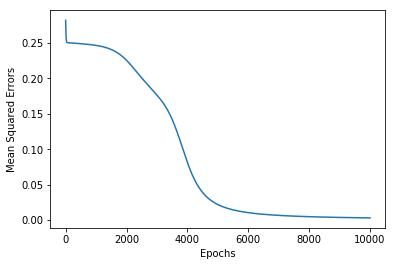

In [20]:
import numpy as np
#np.random.seed(0)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 10000
lr = 0.1
MSE = np.zeros(epochs)
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


#Training algorithm
for i in range(epochs):
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    #Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    MSE[i] = computeMSE(predicted_output, expected_output)

print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)
print("Mean Squared Error: ", end="")
print(*computeMSE(predicted_output, expected_output))
plt.plot(MSE)
plt.ylabel("Mean Squared Errors")
plt.xlabel("Epochs")
plt.show()